C:\Users\pamel\AppData\Local\Temp\ipykernel_11772\3136833061.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


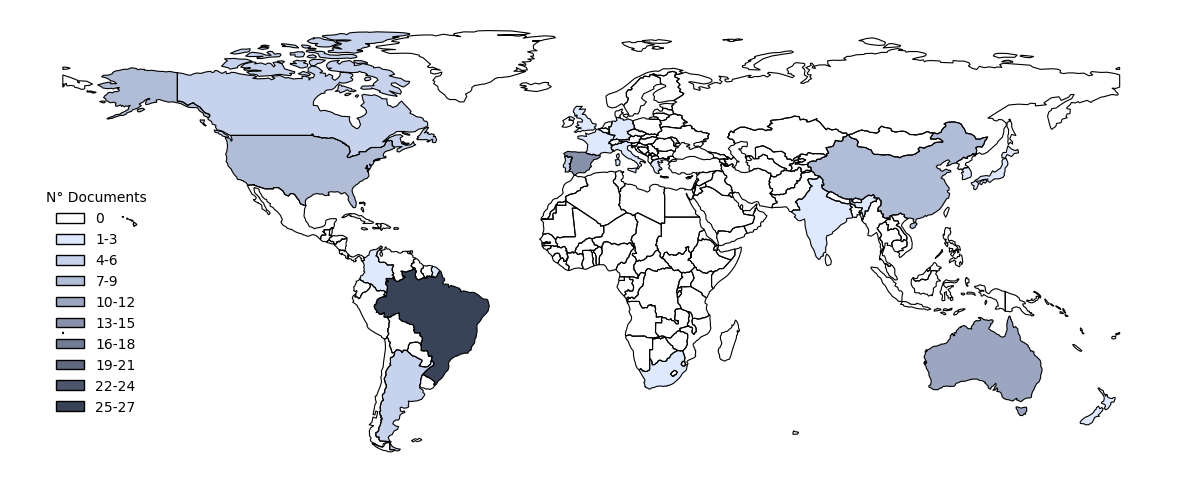

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("C:/Users/pamel/Downloads/Most_Relevant_Countries_By_Corresponding_Author.csv")

# Handle NaN values in the 'Articles' column
df['Articles'] = df['Articles'].fillna(0)

# Load the shapefile of the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Exclude Antarctica
world = world[world['continent'] != 'Antarctica']

# Merge the pandas DataFrame with the geopandas GeoDataFrame
merged = world.set_index('iso_a3').join(df.set_index('Country'))

# Normalize the 'Articles' column to get the percentage of documents for each country
df['Articles'] = df['Articles'] / df['Articles'].sum() * 100

# Define your custom colormap
custom_colors = ['#ffffff', '#dee9ff', '#c7d2ed', '#b1bcd6', '#9ca6c0', '#8791aa', '#727c95', '#5e6980', '#4b556c', '#384358']
cmap_custom = ListedColormap(custom_colors)

# Create the figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(15, 10))

# Define the class intervals and corresponding colors
class_intervals = [0, 1, 4, 7, 10, 13, 16, 19, 22, 25]
norm = BoundaryNorm(class_intervals, len(custom_colors) - 1)

# Create the map using the custom colormap and class intervals
merged.plot(column='Articles', ax=ax, legend=False, cmap=cmap_custom, norm=norm)
world.boundary.plot(ax=ax, linewidth=0.8, color='black')
ax.set_axis_off()

# Create a list of labels for the legend
labels = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24', '25-27']

# Create a list of patches for the legend
legend_patches = [mpatches.Patch(facecolor=color, edgecolor='black', label=label) for color, label in zip(custom_colors, labels)]

# Create the legend 
plt.legend(handles=legend_patches, loc='lower left', frameon=False, title='N° Documents', bbox_to_anchor=(0.02, 0.1))

# Show the map
plt.show()